## Plot learning curves

In [1]:
from sklearn.externals import joblib
import numpy as np
from sklearn.model_selection import learning_curve
from kipoi_cadd.utils import load_pickle
from scipy.sparse import csr_matrix, save_npz, load_npz
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
training_dir = "/s/project/kipoi-cadd/data/raw/v1.3/training_data/"
model_file = "/tmp/gin-train/fd13a72911264dcd91af855222206024/model.h5"
other = "/s/project/kipoi-cadd/data/models/try9/model.h5"
ids_10k_file = training_dir + "sample_indices/ids_10k.pkl"
sparse_all = training_dir + "sparse_all.npz"
all_ids_file = training_dir + "variant_ids.pkl"

In [3]:
ids = load_pickle(ids_10k_file)
clf = joblib.load(model_file)
res = load_npz(sparse_all)
all_ids = load_pickle(all_ids_file)

In [ ]:
tmp = all_ids.sample(len(all_ids), random_state=50)
tmp.index.values

In [62]:
res.shape[]

(35043060, 1064)

In [ ]:
shuff_res = res[tmp.index.values,:]

/opt/modules/i12g/anaconda/3-5.0.1/envs/kipoi-cadd2/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1.0

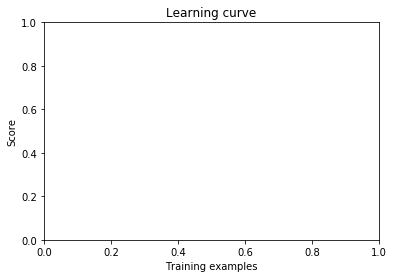

In [69]:
plt.figure()
plt.title("Learning curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(
        clf, shuff_res[:,1:], shuff_res[:,1].toarray().ravel(), n_jobs=10,
        train_sizes=[1000,10000, 100000, 1000000, 10000000])
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")